<html>
    <head>
    </head>
    <body>
        <table style="width:100%;text-align:center;">
          <tr>
              <th style="border-top-width:thick;border-top:solid;border-top-color:#15A0D1;width:20%;font-size:140%;text-align:center;color:#15A0D1;background-color:#E6F4F9;">Asignatura
              </th>
              <th style="border-width:1px;border:solid;border-color:#15A0D1;width:60%;font-size:140%;text-align:center;color:#15A0D1;background-color:#E6F4F9;">Datos de alumnos/profesores
              </th>
              <th style="border-top-width:thick;border-top:solid;border-top-color:#15A0D1;font-size:140%;text-align:center;color:#15A0D1;background-color:#E6F4F9;">Fecha
              </th>
          </tr>
          <tr>
              <th rowspan="2" style="border-bottom-width:thick;border-bottom:solid;border-bottom-color:#15A0D1;border-top-width:thick;border-top:solid;border-top-color:#15A0D1;width:20%;font-size:140%;text-align:center;">
                  <b>Percepción Computacional</b>
              </th>
              <td style="border-width:1px;border:solid;border-color:#15A0D1;width:60%;font-size:125%;text-align:left;">Alumnos: Fernando Arroyo Rubio, Federico Damián Estébanez y Adoración Fernández Miranda</td>
              <td rowspan="2" style="border-bottom-width:thick;border-bottom:solid;border-bottom-color:#15A0D1;border-top-width:thick;border-top:solid;border-top-color:#15A0D1;vertical-align:middle;font-size:125%;text-align:center;">26/06/2019
              </td>
          </tr>
          <tr>
              <td style="border-width:1px;border:solid;border-color:#15A0D1;width:60%;font-size:125%;text-align:left;">Profesores: José Víctor Marco Martín y Alberto de Santos Sierra</td>
          </tr>
        </table>
    </body>
</html>


## Laboratorio: Caracterización de textura mediante LBP.


### Objetivos

El objetivo de este laboratorio es conocer, con mayor profundidad y en un escenario práctico, uno de los operadores más comunes en el procesado de imagen: los patrones binarios locales (LBP por sus siglas en inglés, local binary patterns). Entre otros usos, este operador es empleado habitualmente para la caracterización de textura.


### Descripción

El ejercicio consiste en los siguientes pasos:
    
   - En primer lugar, se desea obtener el histograma de la imagen resultante de aplicar el operador LBP uniforme. Para ello, se tomará un radio igual a 3 y 24 puntos. En total, deben calcularse tres histogramas, uno para cada una de las texturas que se muestran a continuación.
    

![Figura 1](tema12_act.png)
<center>Figura 1. Texturas para realizar la actividad.</center>
<center>Fuente:<a href="http://www.ux.uis.no/~tranden/brodatz.html">http://www.ux.uis.no/~tranden/brodatz.html</a></center>


   - El objetivo de utilizar LBP uniformes sobre estas texturas es poder diferenciarlas de forma automática. Por ello, se pide indicar qué **atributos** pueden calcularse en los histogramas a fin de caracterizar las texturas.
    
   - Por último, tal y como se ha explicado en el tema, el operador LBP uniforme es invariante a rotación. Es decir, el resultado del mismo es independiente de la orientación de la textura o imagen de entrada. Se pide, por tanto, demostrar de forma práctica esta **propiedad de invarianza**.

Como consejo, se .sugiere inspeccionar el uso de Rotate en Skimage.

### Criterios de evaluación

Se evaluará la capacidad para:

   - Obtener de forma autónoma información sobre librerías y funciones nunca antes empleadas.
   - Aplicar operadores avanzados de procesado de imagen como es el caso de los LBP.
   - Definir estrategias para la caracterización de un histograma.
   - Identificar en qué consiste la propiedad de invarianza rotacional de un operador.

## 1. -  Importando librerías necesarias para la práctica.

numpy — Objetos y rutinas para el procesamiento de matrices multidimensionales.

    - Operaciones matemáticas y lógicas en matrices.
    - Transformadas de Fourier y rutinas para la manipulación de formas.
    - Operaciones relacionadas con el álgebra lineal, integradas para álgebra lineal y generación de números aleatorios.

matplotlib — Funciones de trazado 2D.

    Genera gráficos, histogramas, espectros de potencia, gráficos de barras, gráficos de error, diagramas de dispersión, etc.
    
    matplotlib.pyplot es una colección de funciones de estilo de comando que hacen que funcione como MATLAB.

math — Funciones matemáticas.

    Proporciona acceso a las funciones matemáticas definidas en C estándar.
    
skimage — Funciones para el procesamiento de imágenes.

    Procesamiento digital de imágenes, binarización, segmentación, y otras operaciones típicas.
   
scipy — Funciones utilizadas para computación científica y técnica.

    SciPy contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales e imágenes, solucionadores de EDO y otras tareas comunes en ciencia e ingeniería. 

copy — Funciones para operaciones de copia superficial y profunda.

    Este módulo proporciona operaciones genéricas de copia superficial y profunda.   

In [1]:
# Importación de librerías a utilizar
import numpy as np # Objetos y rutinas para el procesamiento de matrices multidimensionales.
import matplotlib  # Funciones de trazado 2D.
import math        # Funciones matemáticas.
import skimage     # Funciones para el procesamiento de imágenes.
import scipy       # Funciones utilizadas para computación científica y técnica.
import copy        # Funciones para operaciones de copia superficial y profunda.

from matplotlib import pyplot as plt 
from matplotlib import patches as mpatches
from skimage import data, io, img_as_float, filters, color, exposure
from skimage import feature, segmentation, morphology, measure, transform
from scipy import ndimage as ndi
from scipy.signal import convolve2d
from copy import deepcopy

In [2]:
# Imprimimos versión de Python 
print("Versión Python:")
!python --version 

Versión Python:
Python 3.7.1


In [3]:
# Versiones de librerías 
print('    Versión numpy      :', np.__version__)
print('    Versión matplotlib :', matplotlib.__version__)
print('    Versión skimage    :', skimage.__version__)
print('    Versión scipy      :', scipy.__version__)


    Versión numpy      : 1.15.4
    Versión matplotlib : 3.0.2
    Versión skimage    : 0.14.1
    Versión scipy      : 1.1.0


### 2. - Definición de Funciones.

#### Función para mostrar Imagen y sus características.

Se define la función "img_desc(p_img, p_desc=True)":

- Argumentos: <sup>[001]</sup>

     . p_img..: Imagen a visualizar y mostrar sus características.
     
     . p_desc..: Valor deseado para mostrar o no las características de la imagen.
     
     
- Descripción función:

     . Muestra las características de la imagen recibida, como dimensiones y tipo. <sup>[002]</sup>
     
     . Muestra la imagen recibida. <sup>[003]</sup>

In [4]:
print("         1         2         3         4         5         6         7         8")
print("12345678901234567890123456789012345678901234567890123456789012345678901234567890")
print("################################################################################")
print("################################################################################")
print("Función para mostrar Imagen y sus Características.")
print("INI img_desc()")
def img_desc(p_img, p_desc=True):                                                #### [001]
    if (p_desc):
        # Imprimir información datos de la imagen                                #### [002]
        print("<<Características de la variable que contiene la imagen>> ")
        print("Tipo.......................:", type(p_img))
        print("Dimensiones................:" , len(p_img.shape), "de tamaños", p_img.shape) 
        print("Tipo de los elementos......:", p_img.dtype)

        # Obtendremos el número total de elementos(pixeles), multiplicando el 
        # número de elementos(pixeles) de cada dimensión del array.               #### [002]
        pixels = 1
        for i in range(len(p_img.shape)):
            pixels = pixels * p_img.shape[i]
        print("Lo que supone un total de..:" , pixels, "elementos del Array(pixeles)")
        print("Rango valores elementos....: [", p_img.min(), ", ", p_img.max(),"]")
    
    # Mostrar la imagen                                                           #### [003]
    io.imshow(p_img)
    io.show()
print("END img_desc()")
print("################################################################################")
print("################################################################################")

         1         2         3         4         5         6         7         8
12345678901234567890123456789012345678901234567890123456789012345678901234567890
################################################################################
################################################################################
Función para mostrar Imagen y sus Características.
INI img_desc()
END img_desc()
################################################################################
################################################################################


In [5]:
print("################################################################################")
print("################################################################################")
print("INI ver_dif()")
# Calcular las diferencias entre el número de ocurrencias de cada etiqueta 
# de la imagen y su rotada 
def ver_dif(texto , tex_ori, tex_rot):
    print(texto)
    # Ver las etiquetas que hay de cada clase
    uni_ori, cou_ori = np.unique(tex_ori, return_counts=True)
    uni_rot, cou_rot = np.unique(tex_rot, return_counts=True)
    dif = cou_ori - cou_rot
    #print(cou_ori)
    #print(cou_rot)
    print("Diferencias entre ocurrencias etiquetas entre imgOriginal y su rotada.")
    dic_1 = dict(zip(uni_ori, dif))
    print(dic_1)

    # Total de etiquetas
    sum_ori = sum(cou_ori)
    sum_rot = sum(cou_rot)
    #print(sum_ori,sum_rot)

    # Porcentaje de cada etiqueta
    per_ori = (cou_ori / sum_ori) * 100.0 
    per_rot = (cou_rot / sum_rot) * 100.0 
    #print(per_ori)
    #print(per_rot)
    
    # Diferencia de porcentajes
    dif_per = per_ori - per_rot
    #print(dif_per)
    #dic_2 = dict(zip(uni_ori, dif_per))
    print("\nPorcentaje de Diferencias entre ocurrencias etiquetas entre imgOriginal y su rotada.")
    print(dif_per)
    per_max = dif_per.max()
    if (per_max < abs(dif_per.min())) : per_max = abs(dif_per.min()) 
    print("\nLa diferencia máxima es de %.2f%%" % per_max)
print("END ver_dif()")
print("################################################################################")
print("################################################################################")

################################################################################
################################################################################
INI ver_dif()
END ver_dif()
################################################################################
################################################################################


In [6]:
print("################################################################################")
print("################################################################################")
print("INI com_text()")
def com_text(p_lbp1, p_lbp2, p_perc=1.0):
    # Diferencias entre ocurrencias etiquetas entre dos imágenes
    uni_ori, cou_ori = np.unique(p_lbp1, return_counts=True)
    uni_rot, cou_rot = np.unique(p_lbp2, return_counts=True)
    dif = cou_ori - cou_rot

    # Total de etiquetas
    sum_ori = sum(cou_ori)
    sum_rot = sum(cou_rot)

    # Porcentaje de cada etiqueta
    per_ori = (cou_ori / sum_ori) * 100.0 
    per_rot = (cou_rot / sum_rot) * 100.0 

    # Diferencia de porcentajes
    dif_per = per_ori - per_rot
    
    # Diferencia máxima
    per_max = dif_per.max()
    if (per_max < abs(dif_per.min())) : per_max = abs(dif_per.min()) 
    #print("\nLa diferencia máxima es de %.2f%%" % per_max)

    if (per_max >= p_perc):
        return False
    else:
        return True
print("END com_text()")
print("################################################################################")
print("################################################################################")    

################################################################################
################################################################################
INI com_text()
END com_text()
################################################################################
################################################################################


### 3. - Carga de imágenes.

Descargamos desde http://www.ux.uis.no/~tranden/brodatz.html las imágenes que corresponden  a las texturas solicitadas y que creemos son los ficheros  "D1.gif", "D17.gif" y "D64.gif".

In [7]:
# Vamos a cargar las imágenes 
# descargadas desde http://www.ux.uis.no/~tranden/brodatz.html
text1 = img_as_float(io.imread(fname="D1.gif", as_gray=True))  #tamaño (643, 643)
text2 = img_as_float(io.imread(fname="D17.gif", as_gray=True)) #tamaño (640, 640)
text3 = img_as_float(io.imread(fname="D64.gif", as_gray=True)) #tamaño (640, 640)


<<Características de la variable que contiene la imagen>> 
Tipo.......................: <class 'numpy.ndarray'>
Dimensiones................: 2 de tamaños (643, 643)
Tipo de los elementos......: float64
Lo que supone un total de..: 413449 elementos del Array(pixeles)
Rango valores elementos....: [ 0.0 ,  1.0 ]


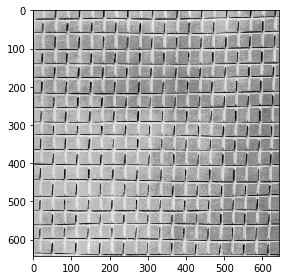

In [8]:
# Mostrar imagen y sus características
img_desc(text1, True)

<<Características de la variable que contiene la imagen>> 
Tipo.......................: <class 'numpy.ndarray'>
Dimensiones................: 2 de tamaños (640, 640)
Tipo de los elementos......: float64
Lo que supone un total de..: 409600 elementos del Array(pixeles)
Rango valores elementos....: [ 0.0 ,  1.0 ]


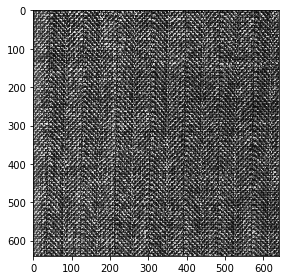

In [9]:
# Mostrar imagen y sus características
img_desc(text2, True)

<<Características de la variable que contiene la imagen>> 
Tipo.......................: <class 'numpy.ndarray'>
Dimensiones................: 2 de tamaños (640, 640)
Tipo de los elementos......: float64
Lo que supone un total de..: 409600 elementos del Array(pixeles)
Rango valores elementos....: [ 0.054901960784313725 ,  1.0 ]


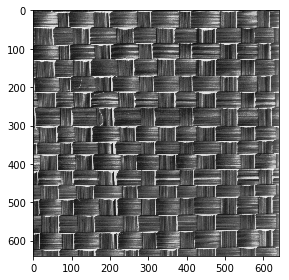

In [10]:
# Mostrar imagen y sus características
img_desc(text3, True)

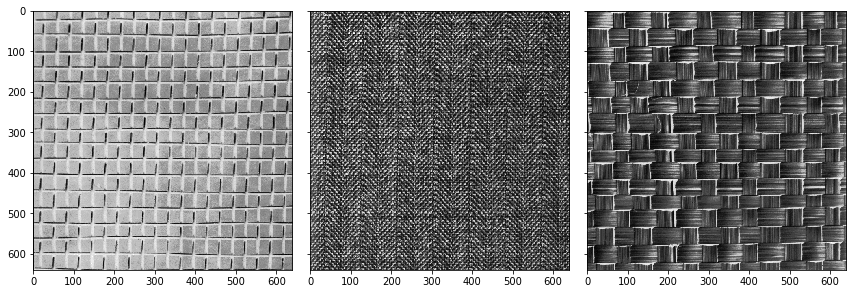

In [11]:
# Visualización conjunta de las 3 texturas
fig, imgs = plt.subplots(ncols=3, figsize=(12,12), sharex=True, sharey=True)
imgs[0].imshow(text1, cmap='gray', aspect='equal')
imgs[1].imshow(text2, cmap='gray', aspect='equal')
imgs[2].imshow(text3, cmap='gray', aspect='equal')
plt.tight_layout()
plt.show()

### 3. - Patrón binario local para la clasificación de texturas.

En este ejemplo, veremos cómo clasificar texturas basadas en LBP (Local Binary Pattern). LBP observa los puntos que rodean un punto central y comprueba si los puntos circundantes son mayores o menores que el punto central (es decir, da un resultado binario) que ademas se obtiene rotando circularmente cada patrón de bits al valor mínimo.

Un patrón binario local se denomina **uniforme** si su cadena de bits contiene como
máximo dos transiciones de 0 a 1 o viceversa.


   - En primer lugar, se desea obtener el histograma de la imagen resultante de aplicar el operador LBP uniforme. Para ello, se tomará un radio igual a 3 y 24 puntos. En total, deben calcularse tres histogramas, uno para cada una de las texturas que se muestran a continuación.
    

In [12]:
# Parámetros para calcular LBP
radio = 3
num_vecinos = 8 * radio
method_LBP = "uniform"

# Calculamos las matrices de etiquetas para cada punto de las 3 imágenes de las texturas
lbp1 = feature.local_binary_pattern(text1, num_vecinos, radio, method_LBP)
lbp2 = feature.local_binary_pattern(text2, num_vecinos, radio, method_LBP)
lbp3 = feature.local_binary_pattern(text3, num_vecinos, radio, method_LBP)


In [14]:
# Revisamos los valores de etiquetas para cada punto
print("Textura 1")
print("Tipo.......................:", type(lbp1))
print("Dimensiones................:" , len(lbp1.shape), "de tamaños", lbp1.shape)
print("Tipo de los elementos......:", lbp1.dtype)
print("Rango valores elementos....: [", lbp1.min(), ", ", lbp1.max(),"]")
print(lbp1)


Textura 1
Tipo.......................: <class 'numpy.ndarray'>
Dimensiones................: 2 de tamaños (643, 643)
Tipo de los elementos......: float64
Rango valores elementos....: [ 0.0 ,  25.0 ]
[[ 4. 24.  7. ... 25.  8. 25.]
 [25. 24.  8. ...  5.  5.  1.]
 [25. 24. 25. ... 25.  4. 25.]
 ...
 [25. 24.  7. ... 25. 25. 25.]
 [25. 24.  7. ...  2. 25. 25.]
 [25. 24.  6. ...  1.  1.  1.]]


In [15]:
# Revisamos los valores de etiquetas para cada punto
print("Textura 2")
print("Tipo.......................:", type(lbp2))
print("Dimensiones................:" , len(lbp2.shape), "de tamaños", lbp2.shape)
print("Tipo de los elementos......:", lbp2.dtype)
print("Rango valores elementos....: [", lbp2.min(), ", ", lbp2.max(),"]")
print(lbp2)


Textura 2
Tipo.......................: <class 'numpy.ndarray'>
Dimensiones................: 2 de tamaños (640, 640)
Tipo de los elementos......: float64
Rango valores elementos....: [ 0.0 ,  25.0 ]
[[25. 25.  2. ...  1. 25.  6.]
 [ 7. 25. 25. ...  0.  2.  2.]
 [25. 25. 25. ...  2. 25.  2.]
 ...
 [25. 25. 25. ...  6.  9.  6.]
 [25. 25. 25. ... 11. 11.  9.]
 [25. 25.  3. ... 10.  9.  7.]]


In [16]:
# Revisamos los valores de etiquetas para cada punto
print("Textura 3")
print("Tipo.......................:", type(lbp3))
print("Dimensiones................:" , len(lbp3.shape), "de tamaños", lbp3.shape)
print("Tipo de los elementos......:", lbp3.dtype)
print("Rango valores elementos....: [", lbp3.min(), ", ", lbp3.max(),"]")
print(lbp3)


Textura 3
Tipo.......................: <class 'numpy.ndarray'>
Dimensiones................: 2 de tamaños (640, 640)
Tipo de los elementos......: float64
Rango valores elementos....: [ 0.0 ,  25.0 ]
[[ 0. 25. 10. ...  9.  7. 25.]
 [ 0. 25. 25. ...  1.  0.  0.]
 [ 0.  3. 25. ...  1.  0.  0.]
 ...
 [ 7.  7. 25. ...  3.  1.  1.]
 [ 2.  3.  4. ...  4.  1.  1.]
 [ 2.  4.  5. ...  5.  3.  1.]]


Dimensiones igual a la imagen  de partida, a cada pixel de la imagen se  le asignó una etiqueta. 

26 etiquetas (0, 25) diferentes, tendremos (P+2), siendo P = num_vecinos = 24.

25 etiquetas uniformes + 1 etiqueta para todos los casos no uniformes.

La etiqueta 25 es la no uniforme.


   - El objetivo de utilizar LBP uniformes sobre estas texturas es poder diferenciarlas de forma automática. Por ello, se pide indicar qué **atributos** pueden calcularse en los histogramas a fin de caracterizar las texturas.

Con los histogramas, vemos la frecuencia con que se repite cata etiqueta en cada textura, lo cual nos crea una firma para distinguir unas de otras.


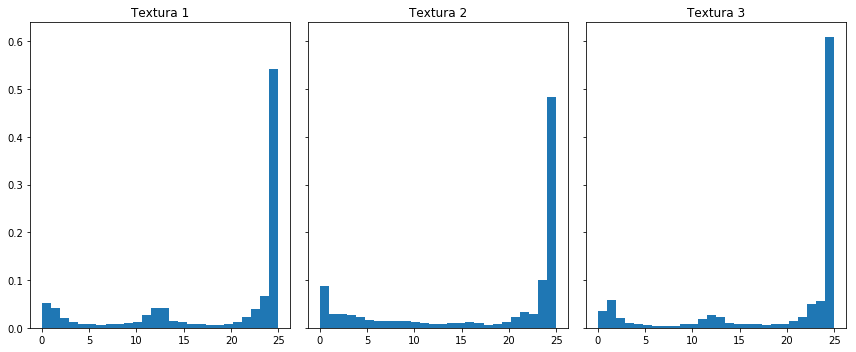

In [17]:
# Veamos los histogramas de las 3 texturas
n_bins= num_vecinos + 2

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,5), sharex=True, sharey=True)
ax0.hist(lbp1.ravel(), density=True, bins=n_bins)
ax1.hist(lbp2.ravel(), density=True, bins=n_bins)
ax2.hist(lbp3.ravel(), density=True, bins=n_bins)
ax0.set_title('Textura 1'); ax1.set_title('Textura 2'); ax2.set_title('Textura 3')
plt.tight_layout()
plt.show()


##### Como vemos, los histogramas primero y tercero, son más similares entre sí, que con el segundo, como era de esperar, dado que ambas texturas también son más similares entre si.

   - Por último, tal y como se ha explicado en el tema, el operador LBP uniforme es invariante a rotación. Es decir, el resultado del mismo es independiente de la orientación de la textura o imagen de entrada. Se pide, por tanto, demostrar de forma práctica esta **propiedad de invarianza**.

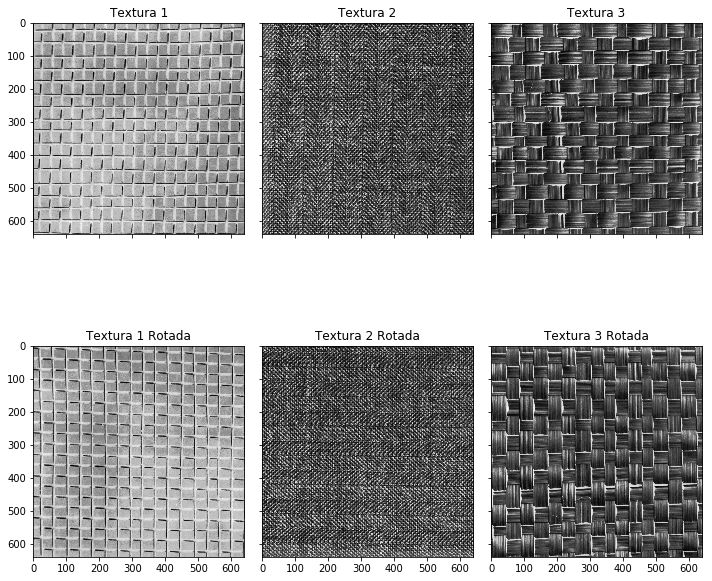

In [18]:
# Rotamos las texturas un ángulo cualquiera.
# Probando varios ángulos con resultados similares
# Se prueba con varios valores de ángulo, obteniendo similares resultados
rot_angle = 90 # ángulo de 90º
text1_rot = transform.rotate(text1, angle=rot_angle,resize=False)
text2_rot = transform.rotate(text2, angle=rot_angle,resize=False)
text3_rot = transform.rotate(text3, angle=rot_angle,resize=False)

# Visualización de imágenes originales y de sus rotaciones
fig, imgs = plt.subplots(nrows=2, ncols=3, figsize=(10,10), sharex=True, sharey=True)
imgs[0][0].imshow(text1, cmap='gray', aspect='equal')
imgs[0][1].imshow(text2, cmap='gray', aspect='equal')
imgs[0][2].imshow(text3, cmap='gray', aspect='equal')
imgs[1][0].imshow(text1_rot, cmap='gray', aspect='equal')
imgs[1][1].imshow(text2_rot, cmap='gray', aspect='equal')
imgs[1][2].imshow(text3_rot, cmap='gray', aspect='equal')
imgs[0][0].set_title('Textura 1')
imgs[0][1].set_title('Textura 2')
imgs[0][2].set_title('Textura 3')
imgs[1][0].set_title('Textura 1 Rotada')
imgs[1][1].set_title('Textura 2 Rotada')
imgs[1][2].set_title('Textura 3 Rotada')

plt.tight_layout()
plt.show()

In [19]:
# Calcular operador LBP para las texturas rotadas
lbp1_rot = feature.local_binary_pattern(text1_rot, num_vecinos, radio, method_LBP)
lbp2_rot = feature.local_binary_pattern(text2_rot, num_vecinos, radio, method_LBP)
lbp3_rot = feature.local_binary_pattern(text3_rot, num_vecinos, radio, method_LBP)


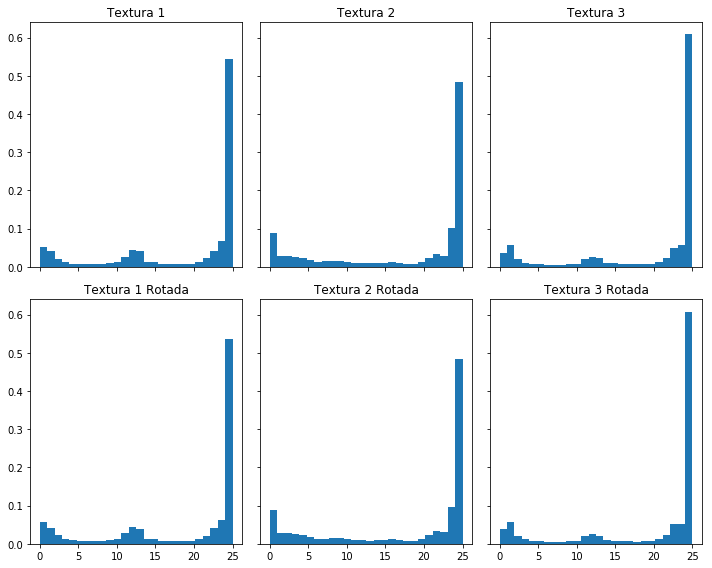

In [20]:
# Comparemos histogramas imágenes originales y rotadas
f, ax = plt.subplots(2, 3, figsize=(10,8), sharex=True, sharey=True)
ax[0][0].hist(lbp1.ravel(), density=True, bins=n_bins)
ax[0][1].hist(lbp2.ravel(), density=True, bins=n_bins)
ax[0][2].hist(lbp3.ravel(), density=True, bins=n_bins)
ax[1][0].hist(lbp1_rot.ravel(), density=True, bins=n_bins)
ax[1][1].hist(lbp2_rot.ravel(), density=True, bins=n_bins)
ax[1][2].hist(lbp3_rot.ravel(), density=True, bins=n_bins)
ax[0][0].set_title('Textura 1')
ax[0][1].set_title('Textura 2')
ax[0][2].set_title('Textura 3')
ax[1][0].set_title('Textura 1 Rotada')
ax[1][1].set_title('Textura 2 Rotada')
ax[1][2].set_title('Textura 3 Rotada')

plt.tight_layout()
plt.show()


#### Visualmente son iguales los histogramas de la textura y su rotada,  con lo cual se demuestra  que el método es invariante a la rotación. 

Pero si nos fijamos mejor, se aprecian pequeñas diferencias, aunque despreciables.

Nota: se ha probado con diferentes valores de ángulos, obteniendo resultados similares


In [21]:
# Se analizan las diferentes entre las ocurrencias/etiqueta entre la imagen1 
# original y su imagen rotada
ver_dif("Textura 1", lbp1, lbp1_rot )

Textura 1
Diferencias entre ocurrencias etiquetas entre imgOriginal y su rotada.
{0.0: -1815, 1.0: 36, 2.0: -574, 3.0: -340, 4.0: -209, 5.0: -196, 6.0: -186, 7.0: -139, 8.0: -135, 9.0: -207, 10.0: -274, 11.0: -892, 12.0: -428, 13.0: 1012, 14.0: 155, 15.0: 43, 16.0: 0, 17.0: 14, 18.0: 48, 19.0: 21, 20.0: 86, 21.0: 31, 22.0: 236, 23.0: -98, 24.0: 1641, 25.0: 2170}

Porcentaje de Diferencias entre ocurrencias etiquetas entre imgOriginal y su rotada.
[-0.43899006  0.00870724 -0.13883212 -0.08223505 -0.05055037 -0.04740609
 -0.04498741 -0.03361962 -0.03265215 -0.05006663 -0.06627178 -0.21574608
 -0.10351942  0.24477021  0.03748951  0.01040032  0.          0.00338615
  0.01160965  0.00507922  0.02080063  0.0074979   0.0570808  -0.02370304
  0.39690506  0.52485313]

La diferencia máxima es de 0.52%


In [22]:
# Se analizan las diferentes entre las ocurrencias/etiqueta entre la imagen2 
# original y su imagen rotada
ver_dif("Textura 2", lbp2, lbp2_rot )# Diferencia

Textura 2
Diferencias entre ocurrencias etiquetas entre imgOriginal y su rotada.
{0.0: -194, 1.0: 95, 2.0: -45, 3.0: -38, 4.0: -15, 5.0: -23, 6.0: -29, 7.0: -25, 8.0: -17, 9.0: 13, 10.0: -22, 11.0: -12, 12.0: -8, 13.0: -14, 14.0: -1, 15.0: 5, 16.0: 35, 17.0: 11, 18.0: 35, 19.0: 18, 20.0: -13, 21.0: 12, 22.0: -100, 23.0: -155, 24.0: 1033, 25.0: -546}

Porcentaje de Diferencias entre ocurrencias etiquetas entre imgOriginal y su rotada.
[-4.73632812e-02  2.31933594e-02 -1.09863281e-02 -9.27734375e-03
 -3.66210938e-03 -5.61523438e-03 -7.08007812e-03 -6.10351562e-03
 -4.15039062e-03  3.17382812e-03 -5.37109375e-03 -2.92968750e-03
 -1.95312500e-03 -3.41796875e-03 -2.44140625e-04  1.22070312e-03
  8.54492188e-03  2.68554687e-03  8.54492188e-03  4.39453125e-03
 -3.17382812e-03  2.92968750e-03 -2.44140625e-02 -3.78417969e-02
  2.52197266e-01 -1.33300781e-01]

La diferencia máxima es de 0.25%


In [23]:
# Se analizan las diferentes entre las ocurrencias/etiqueta entre la imagen3
# original y su imagen rotada
ver_dif("Textura 3", lbp3, lbp3_rot )

Textura 3
Diferencias entre ocurrencias etiquetas entre imgOriginal y su rotada.
{0.0: -1175, 1.0: -96, 2.0: -266, 3.0: -176, 4.0: -110, 5.0: -111, 6.0: -58, 7.0: -79, 8.0: -69, 9.0: -137, 10.0: -132, 11.0: -422, 12.0: -208, 13.0: 346, 14.0: 67, 15.0: 94, 16.0: 54, 17.0: 121, 18.0: 81, 19.0: 94, 20.0: 4, 21.0: 119, 22.0: 66, 23.0: -307, 24.0: 1869, 25.0: 431}

Porcentaje de Diferencias entre ocurrencias etiquetas entre imgOriginal y su rotada.
[-0.28686523 -0.0234375  -0.06494141 -0.04296875 -0.02685547 -0.02709961
 -0.01416016 -0.01928711 -0.0168457  -0.03344727 -0.03222656 -0.10302734
 -0.05078125  0.08447266  0.01635742  0.02294922  0.01318359  0.02954102
  0.01977539  0.02294922  0.00097656  0.02905273  0.01611328 -0.07495117
  0.45629883  0.10522461]

La diferencia máxima es de 0.46%


#### Como vemos en casi todas las etiquetas hay diferencias en los cómputos, pero ninguna mayor del 1%

Podemos utilizar el histograma para distinguir unas texturas de otras, de forma que si todas sus etiquetas no difieren más de 1% entre ellas, estas serán las mismas texturas, en caso contrario se consideran diferentes.
Nota: el % considerado como idóneo, puede configurarse mediante el tercer parámetro de la función ("p_perc", por defecto está a 1%)
def com_text(p_lbp1, p_lbp2, p_perc=1.0):


In [24]:
# Se comparan los LBPs obtenidos para las distintas imágenes, y 
# concluir si es o no la misma textura
if (com_text(lbp1, lbp2)):
    print("Son la misma textura")
else:
    print("Son distintas texturas")


Son distintas texturas


In [25]:
# Se comparan los LBPs obtenidos para las distintas imágenes, y 
# concluir si es o no la misma textura
if (com_text(lbp1, lbp3)):
    print("Son la misma textura")
else:
    print("Son distintas texturas")


Son distintas texturas


In [26]:
# Se comparan los LBPs obtenidos para las distintas imágenes, y 
# concluir si es o no la misma textura
if (com_text(lbp2, lbp3)):
    print("Son la misma textura")
else:
    print("Son distintas texturas")


Son distintas texturas


In [27]:
# Se comparan los LBPs obtenidos para las distintas imágenes, y 
# concluir si es o no la misma textura
if (com_text(lbp1, lbp1_rot)):
    print("Son la misma textura")
else:
    print("Son la misma textura")


Son la misma textura


In [28]:
# Se comparan los LBPs obtenidos para las distintas imágenes, y 
# concluir si es o no la misma textura
if (com_text(lbp2, lbp2_rot)):
    print("Son la misma textura")
else:
    print("Son la misma textura")


Son la misma textura


In [29]:
# Se comparan los LBPs obtenidos para las distintas imágenes, y 
# concluir si es o no la misma textura
if (com_text(lbp3, lbp3_rot)):
    print("Son la misma textura")
else:
    print("Son la misma textura")


Son la misma textura


#### Análisis de las diferencias entre una imagen y su rotada, en cuanto a la etiqueta devuelta por la función LBP
    1. Exploraremos una región al azar  en busca de puntos que estén etiquetados de forma
    diferente para la imagen original y la rotada.
    
    2. Se corrigen las coordenadas de la textura rotada para que sea el mismo punto que el de
    la original.
    
    3. Veremos y estudiaremos los valores de la vecindad cuadrada  de dicho punto.
        

In [30]:
print("Dimensiones................:" , len(lbp1.shape), "de tamaños", lbp1.shape)
# Recorro el array(imagen) por todas sus líneas y columnas 
# solo voy a recorrer una pequeña zona  no toda la imagen
for lin in range(40, 50):# lbp1.shape[0]):
    for col in range(40, 50):#lbp1.shape[1]):
        # Se corrigen las coordenadas de la textura rotada
        lin_r = (lbp1_rot.shape[0] - 1) - col
        col_r = lin 
        # Puntos que estén etiquetados de forma diferente 
        # para la imagen original y la rotada.
        if ((lbp1[lin][col]) != (lbp1_rot[lin_r][col_r])):
            print("Ori[%03d][%03d] Valor del punto: %.4f Etiqueta: %.0f" % 
                  (lin ,  col  , text1[lin][col], lbp1[lin][col]))
            print("Rot[%03d][%03d] Valor del punto: %.4f Etiqueta: %.0f" % 
                  (lin_r, col_r, text1_rot[lin_r][col_r], lbp1_rot[lin_r][col_r]))
            
            # Veremos y estudiaremos los valores de la vecindad cuadrada  de dicho punto.
            so = ""; sr = ""
            # Coordenadas de la vecindad de radio 3
            ic = [+3,+3,+3,+3,+3,+3,+3,+2,+1,+0,-1,-2,-3,-3,-3,-3,-3,-3,-3,-2,-1,+0,+1,+2] 
            il = [-3,-2,-1,+0,+1,+2,+3,+3,+3,+3,+3,+3,+3,+2,+1,+0,-1,-2,-3,-3,-3,-3,-3,-3]
            
            # Recorrer los vecinos de la manzana cuadrada de radio 3
            # que se ha utilizado en el ejercicio.
            for i in range(len(ic)):
                lo = lin+il[i]; lr = lin_r+il[i]; co = col+ic[i]; cr = col_r+ic[i]
                po = "0"; pr = "0"; 
                if (round(text1[lo][co], 2) > round(text1[lin][col], 2)):
                    po = "1"
                if (round(text1_rot[lr][cr], 2) > round(text1_rot[lin_r][col_r], 2)):
                    pr = "1"
                so = so + po ; sr = sr + pr 
            
            #Imprimir vecinos
            print("Vec Ori:%s" %(so))
            print("Vec Rot:%s" %(sr))
            print("-----------------------------------------------------")
            

Dimensiones................: 2 de tamaños (643, 643)
Ori[042][045] Valor del punto: 0.6275 Etiqueta: 25
Rot[597][042] Valor del punto: 0.6275 Etiqueta: 1
Vec Ori:001000000000000001010000
Vec Rot:000000000001010000001000
-----------------------------------------------------
Ori[043][047] Valor del punto: 0.5804 Etiqueta: 23
Rot[595][043] Valor del punto: 0.5804 Etiqueta: 25
Vec Ori:111111101111101111010011
Vec Rot:101111101111010011111111
-----------------------------------------------------
Ori[044][046] Valor del punto: 0.5804 Etiqueta: 23
Rot[596][044] Valor del punto: 0.5804 Etiqueta: 22
Vec Ori:111100101111110001011011
Vec Rot:101111110001011011111100
-----------------------------------------------------
Ori[045][046] Valor del punto: 0.5804 Etiqueta: 23
Rot[596][045] Valor del punto: 0.5804 Etiqueta: 25
Vec Ori:111001011110111000111111
Vec Rot:011110111000111111111001
-----------------------------------------------------
Ori[046][046] Valor del punto: 0.6275 Etiqueta: 25
Rot[596][

### Observaciones


Observando los resultados, se ve que las diferencias detectadas en las etiquetas, no lo son, dado que  los valores son ordenados al valor mínimo para cada etiqueta, tras lo cual las vecindades que se dan, son las mismas para los puntos de la imagen y su rotada.

También se ve, que en muchos puntos, las etiquetas no se corresponden con la combinación de unos y ceros, independientemente de que se etiqueten o no con la misma etiqueta en ambas imágenes.

Esto nos hace pensar, que el cálculo se hace en un vecindario circularmente simétrico,  y no en un vecindario cuadrado. Lo que implica que no sean siempre cogidos ni todos los puntos  que rodean a ese punto, ni los mismos, o que incluso, el valor de estos sea estimado en función de la posición geométrica calculada, con lo cual unas veces se cogerán unos valores y en otras ocasiones serán otros valores, dependiendo del ángulo de rotación,  si bien la mayoría de ellos, serán los mismos, solo que ubicados en otras posiciones.

Estas pequeñas variaciones de algunos pocos vecinos, hace que fácilmente una secuencia “Uniforme”  se  divida y pase a ser “No Uniforme”. También afecta  más a las cadenas de todos “Unos” o “Ceros”, dado que cualquier de estos mínimos cambios se harán más visibles, es por ello que vemos una  mayor diferencia de porcentaje en las etiquetas 0, 24, y 25.